In [1]:
# Math and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pre-processing libraies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Analysis libaries
from sklearn import metrics

In [5]:
# Dataset
df = pd.read_csv('Flight_Booking.csv')

In [6]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA

In [7]:
df.shape

(300153, 11)

In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

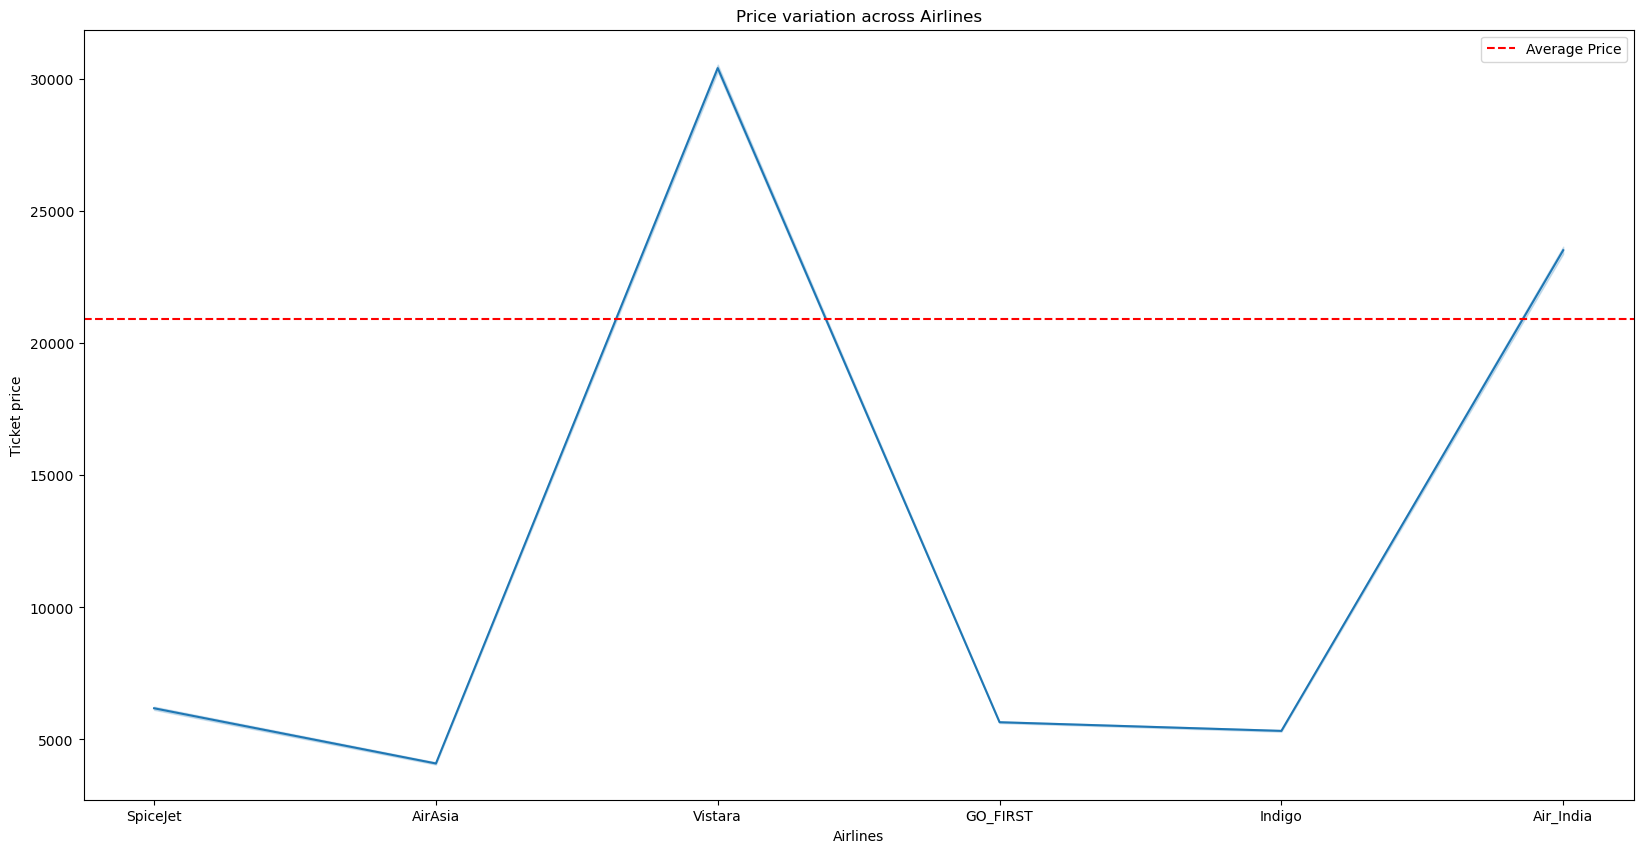

In [11]:
# Price variation across Airlines
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='airline', y='price')
plt.axhline(y=df['price'].mean(), color='red', linestyle='--', label='Average Price')

plt.title('Price variation across Airlines')
plt.xlabel('Airlines')
plt.ylabel('Ticket price')

plt.legend()
plt.show()

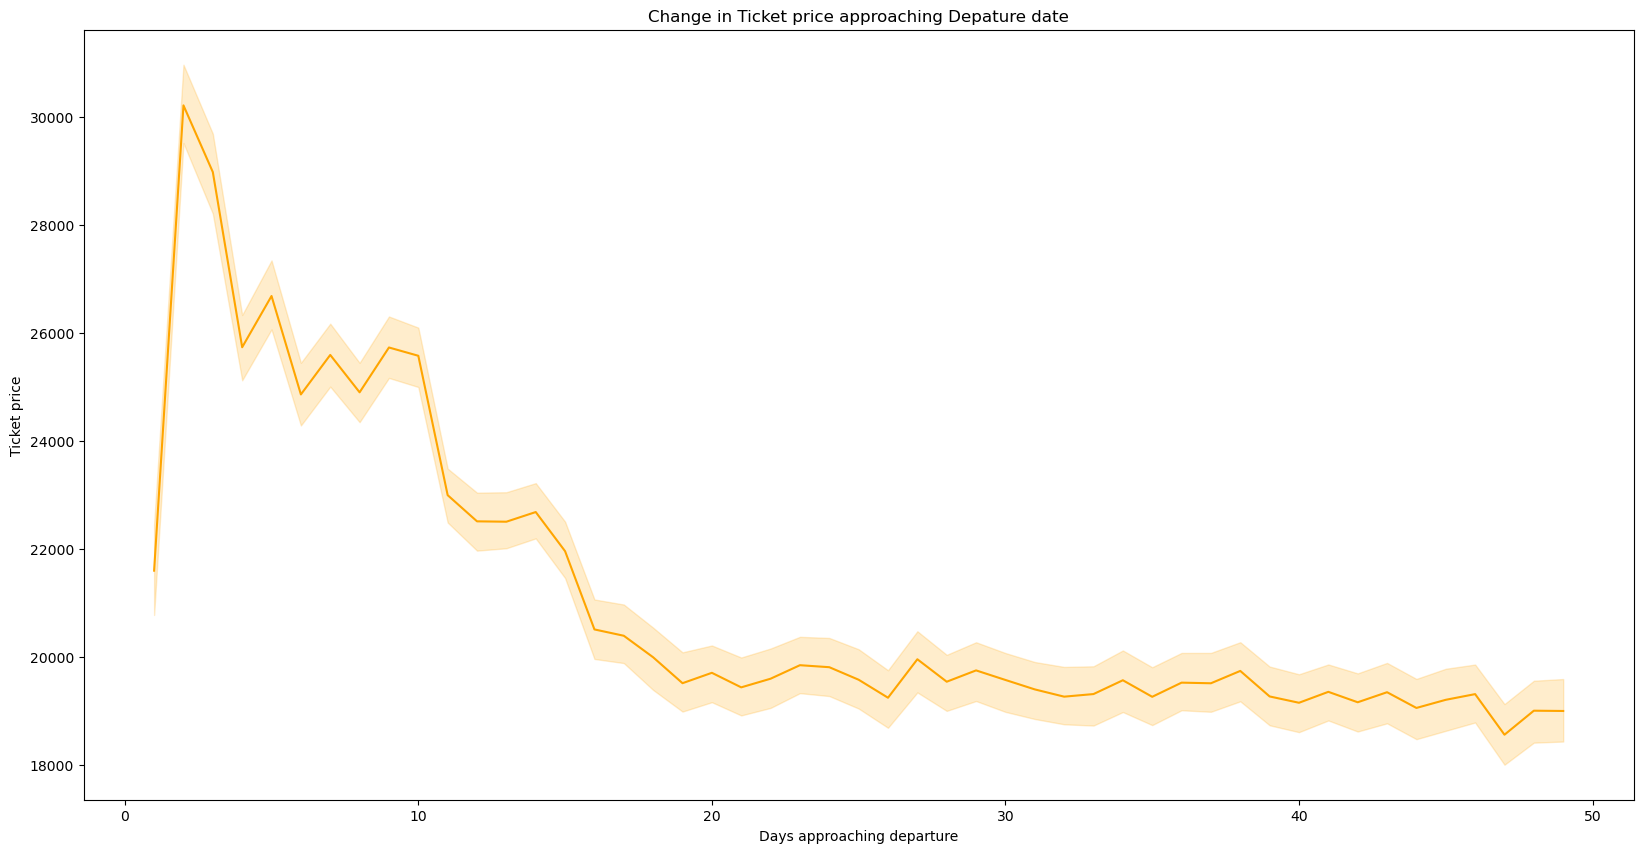

In [12]:
# Change in ticket price approaching depature date
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='days_left', y='price', color='orange')

plt.title('Change in Ticket price approaching Depature date')
plt.xlabel('Days approaching departure')
plt.ylabel('Ticket price')

plt.show()

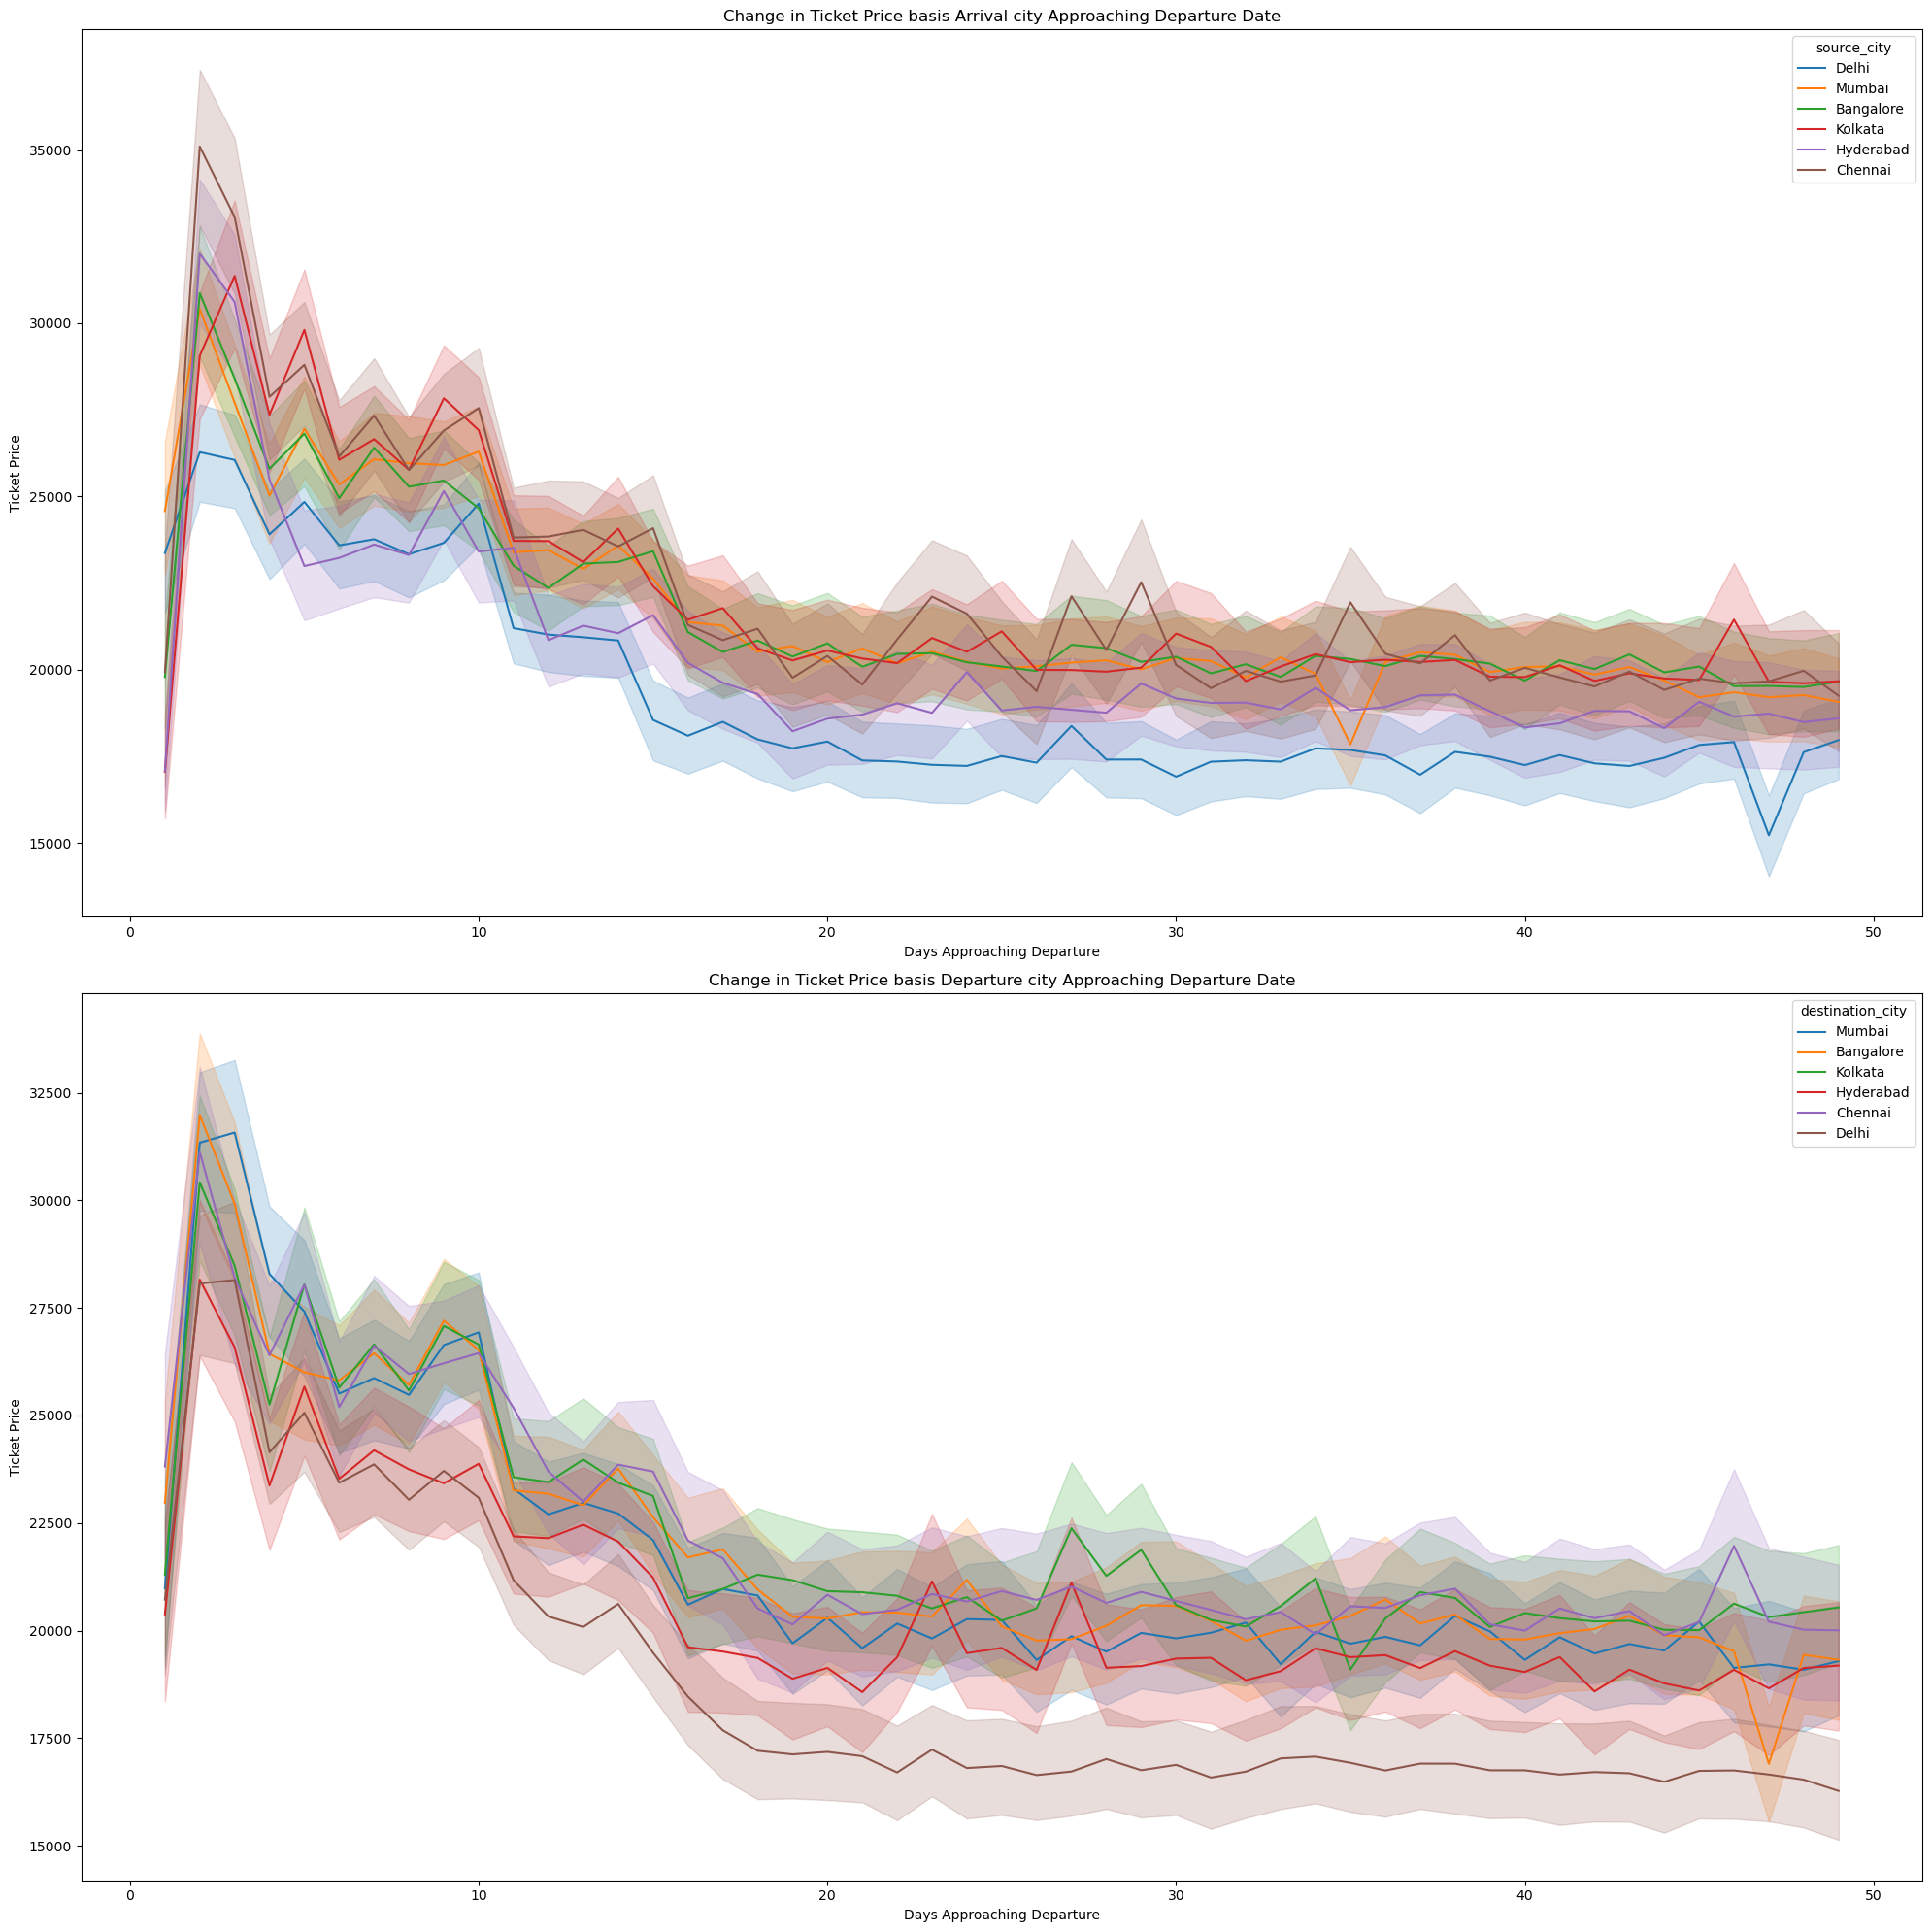

In [13]:
# Change in ticket price for various destinations approaching depature date
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

# Consistent color allocation for cities
palette = sns.color_palette("tab10", n_colors=df['destination_city'].nunique())

# Plot for Arrival city
sns.lineplot(data=df, x='days_left', y='price', hue='destination_city', ax=axes[1], palette=palette)
axes[0].set_title('Change in Ticket Price basis Arrival city Approaching Departure Date')
axes[0].set_xlabel('Days Approaching Departure')
axes[0].set_ylabel('Ticket Price')

# Plot for Departure city
sns.lineplot(data=df, x='days_left', y='price', hue='source_city', ax=axes[0], palette=palette)
axes[1].set_title('Change in Ticket Price basis Departure city Approaching Departure Date')
axes[1].set_xlabel('Days Approaching Departure')
axes[1].set_ylabel('Ticket Price')

plt.tight_layout()
plt.show()

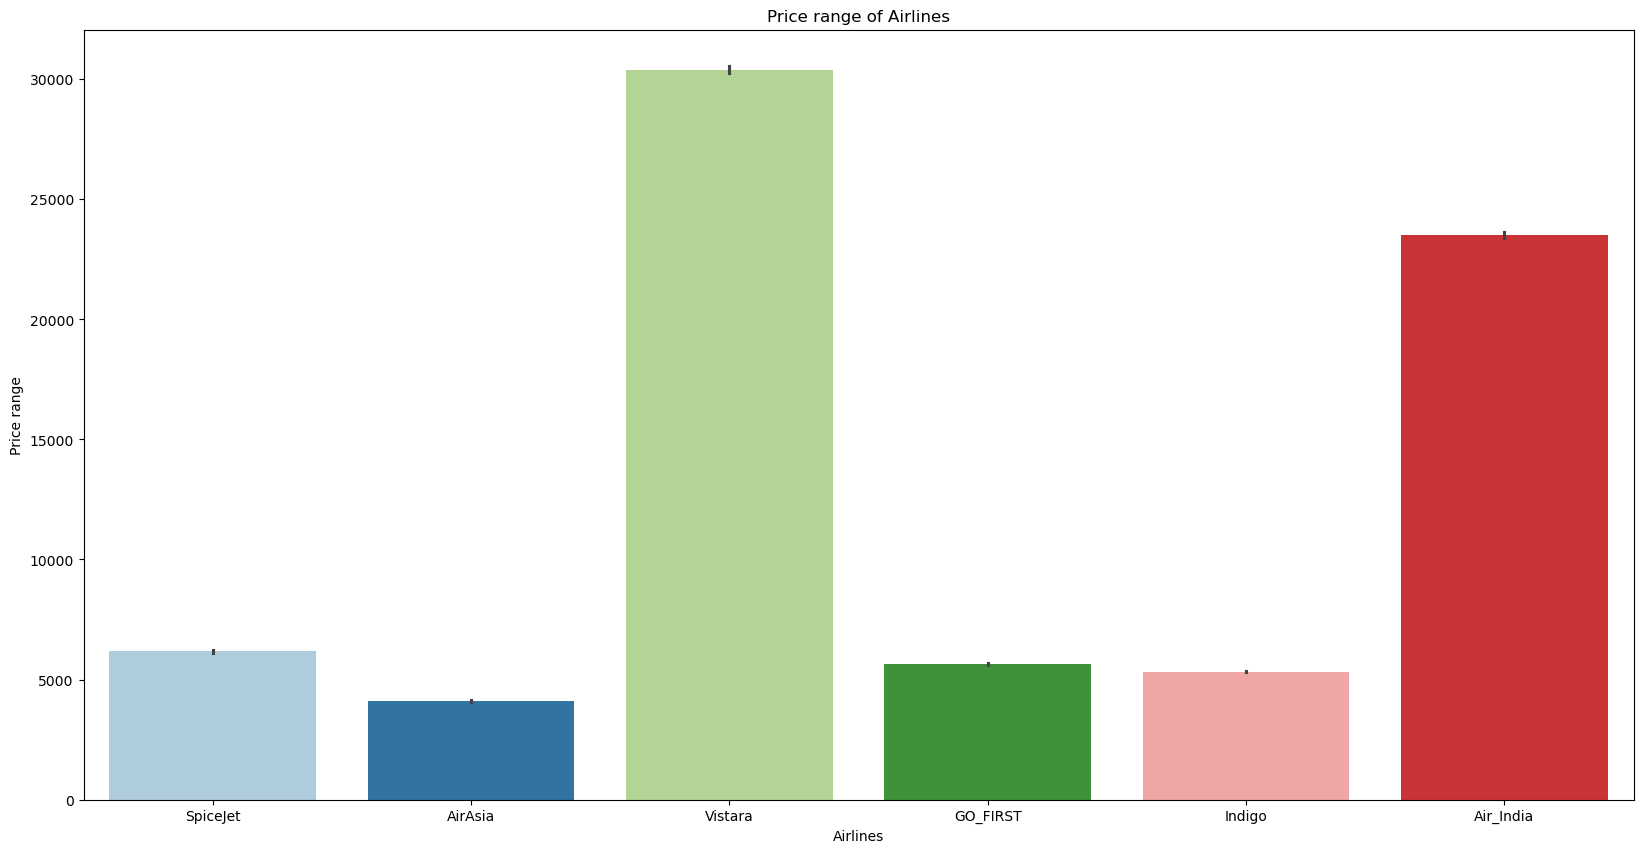

In [14]:
# Price range of airlines
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='airline', y='price', hue='airline', palette='Paired')

plt.title('Price range of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price range')

plt.show()

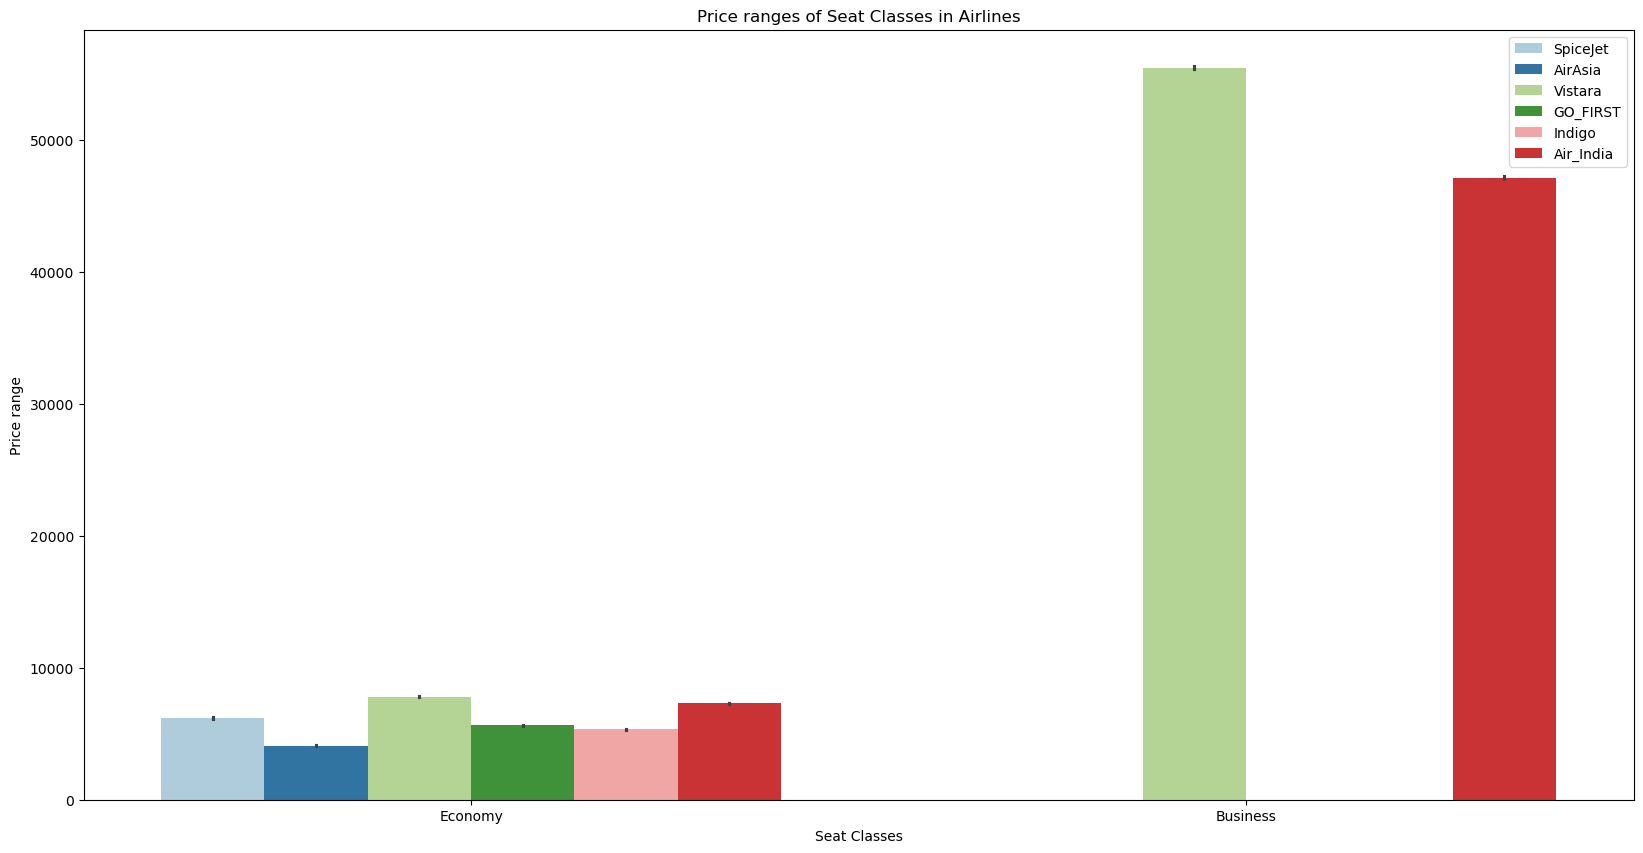

In [15]:
# Price ranges of Seat Classes in Airlines
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='class', y='price', hue='airline', palette='Paired')

plt.title('Price ranges of Seat Classes in Airlines')
plt.xlabel('Seat Classes')
plt.ylabel('Price range')

plt.legend()
plt.show()

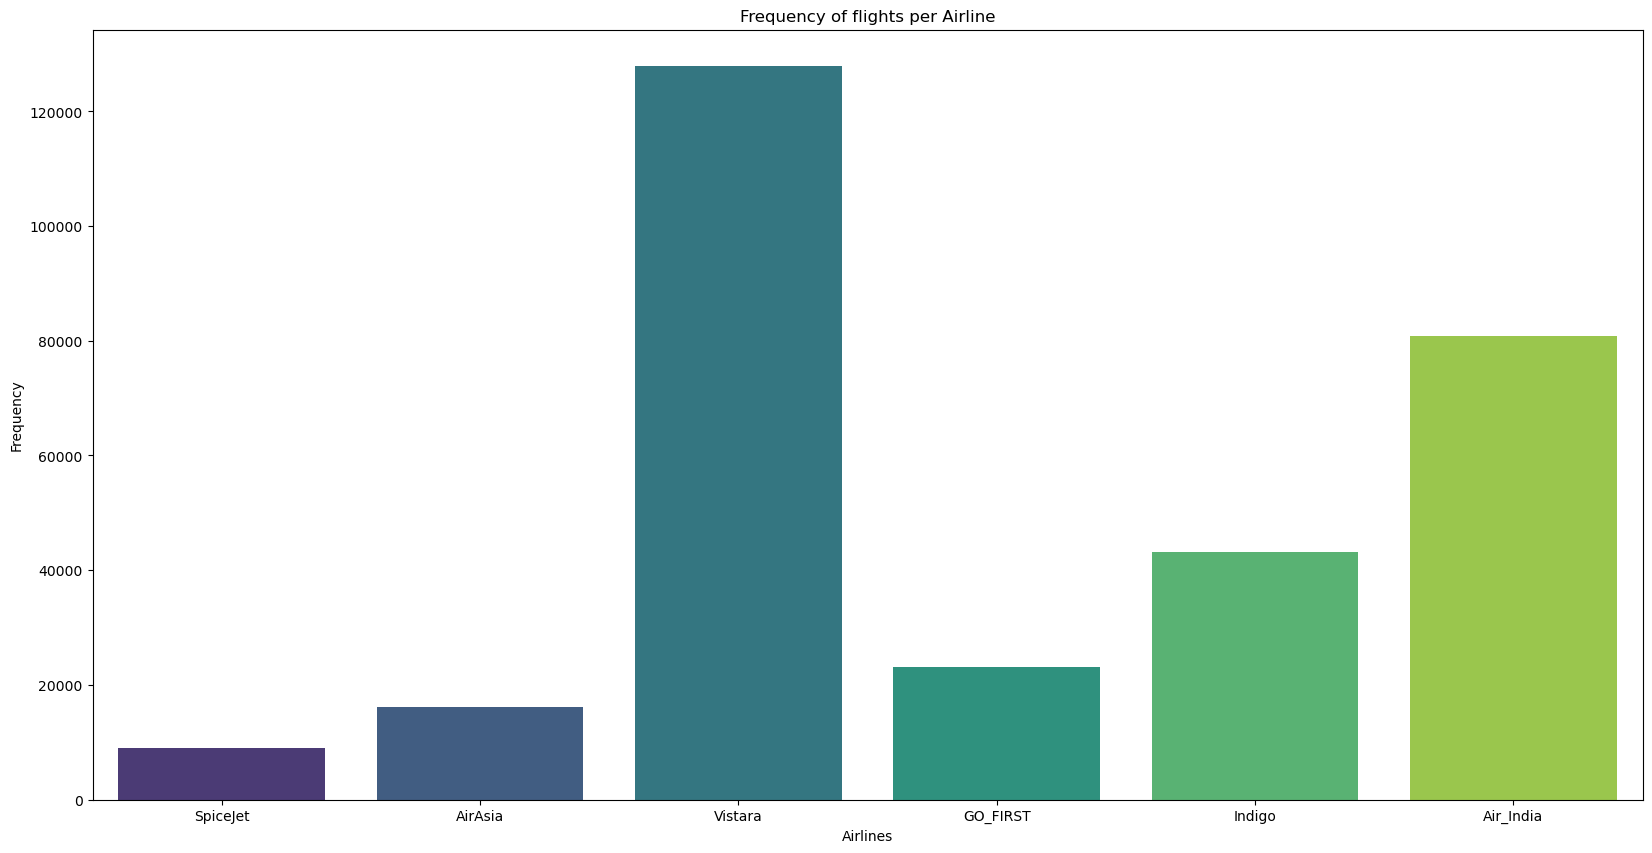

In [16]:
# Frequency of flights per Airline
plt.figure(figsize=(20,10))
sns.countplot(x=df['airline'], hue=df['airline'], palette='viridis')

plt.title('Frequency of flights per Airline')
plt.xlabel('Airlines')
plt.ylabel('Frequency')

plt.show()

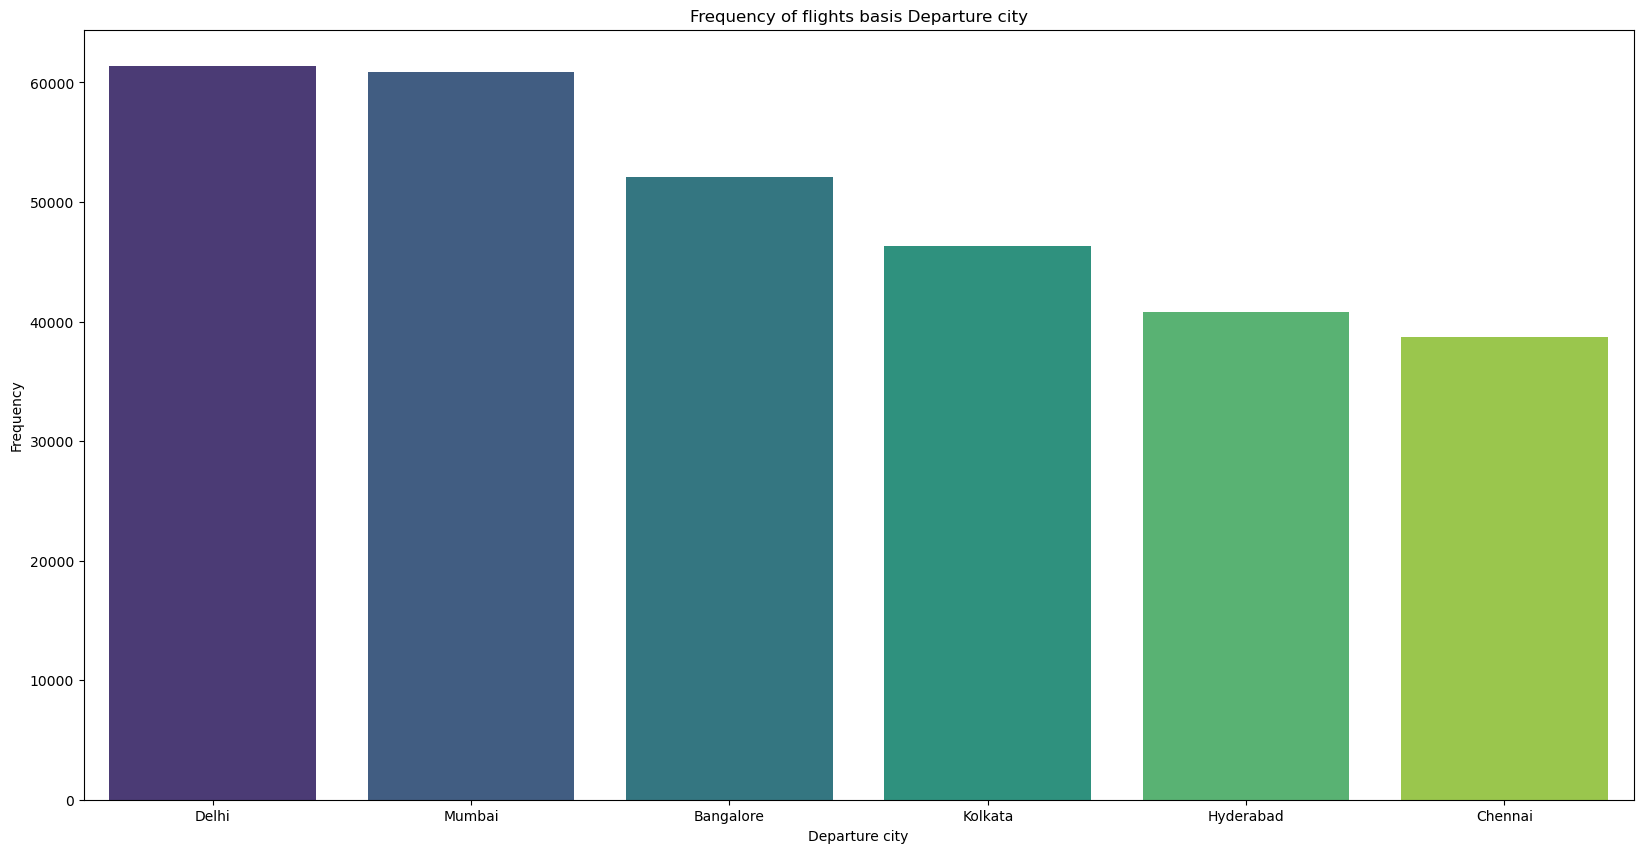

In [17]:
# Frequency of flights basis Departure city
plt.figure(figsize=(20,10))
sns.countplot(x=df['source_city'], hue=df['source_city'], palette='viridis')

plt.title('Frequency of flights basis Departure city')
plt.xlabel('Departure city')
plt.ylabel('Frequency')

plt.show()

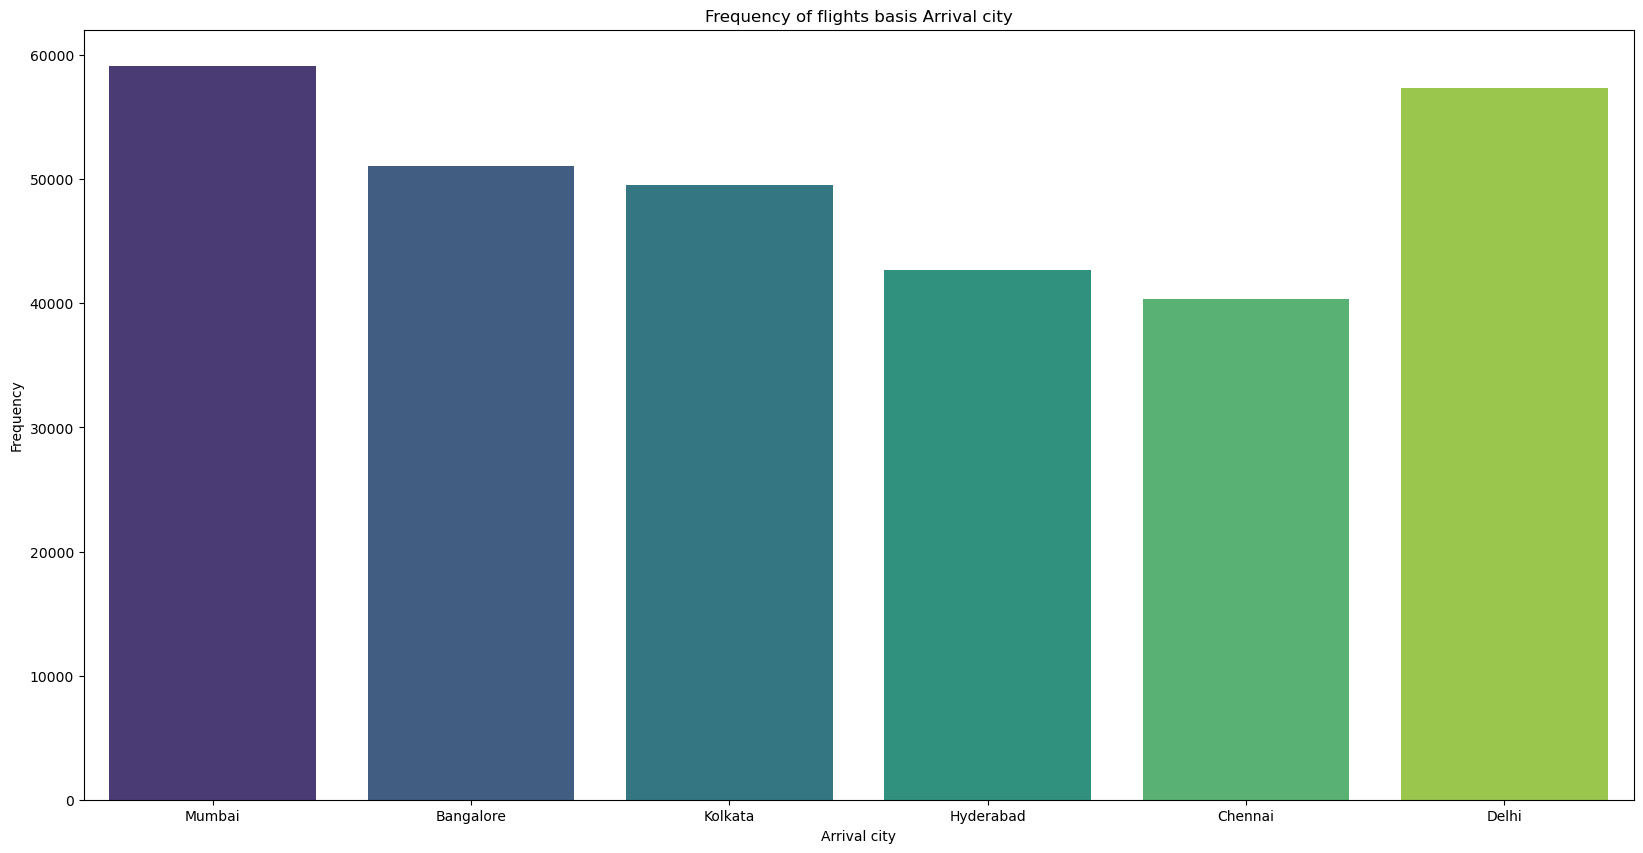

In [18]:
# Frequency of flights basis Arrival city
plt.figure(figsize=(20,10))
sns.countplot(x=df['destination_city'], hue=df['destination_city'], palette='viridis')

plt.title('Frequency of flights basis Arrival city')
plt.xlabel('Arrival city')
plt.ylabel('Frequency')

plt.show()

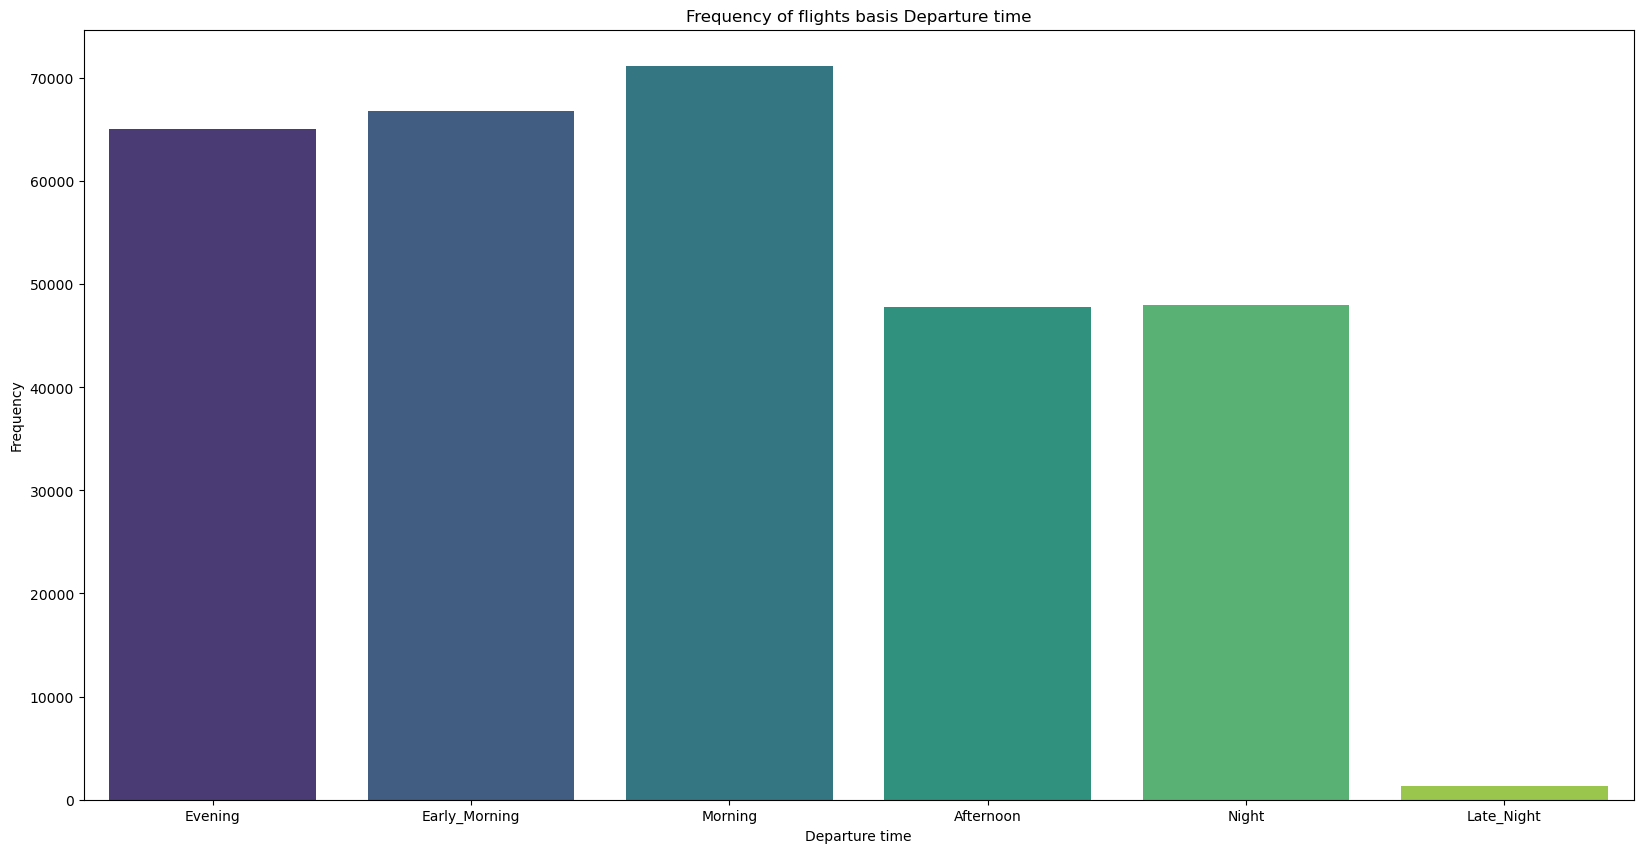

In [19]:
# Frequency of flights basis Departure time
plt.figure(figsize=(20,10))
sns.countplot(x=df['departure_time'], hue=df['departure_time'], palette='viridis')

plt.title('Frequency of flights basis Departure time')
plt.xlabel('Departure time')
plt.ylabel('Frequency')

plt.show()

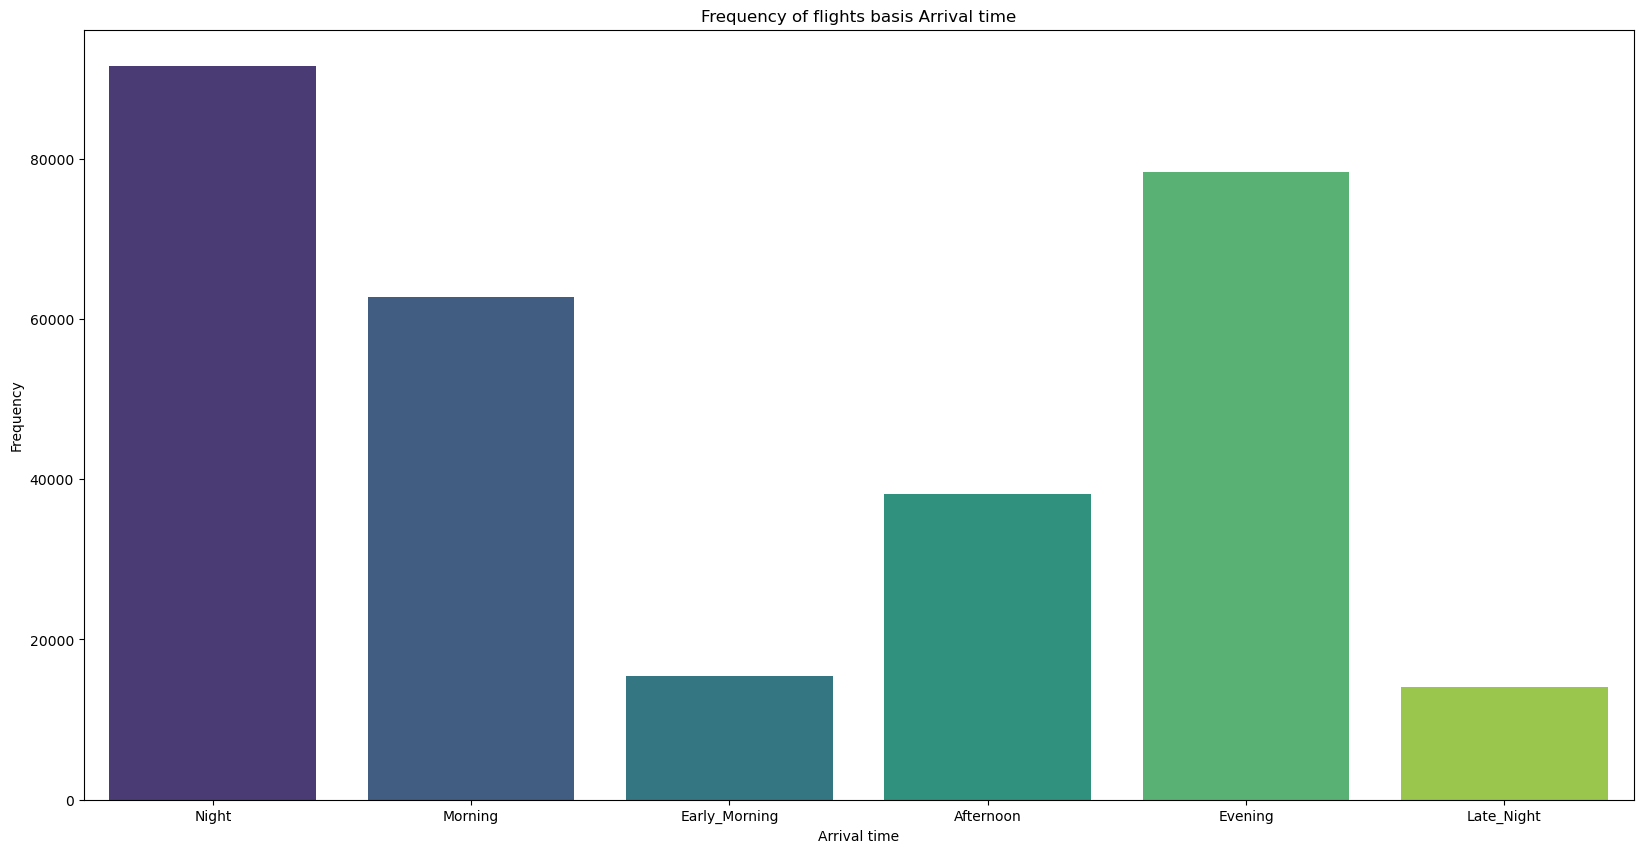

In [20]:
# Frequency of flights basis Arrival time
plt.figure(figsize=(20,10))
sns.countplot(x=df['arrival_time'], hue=df['arrival_time'], palette='viridis')

plt.title('Frequency of flights basis Arrival time')
plt.xlabel('Arrival time')
plt.ylabel('Frequency')

plt.show()

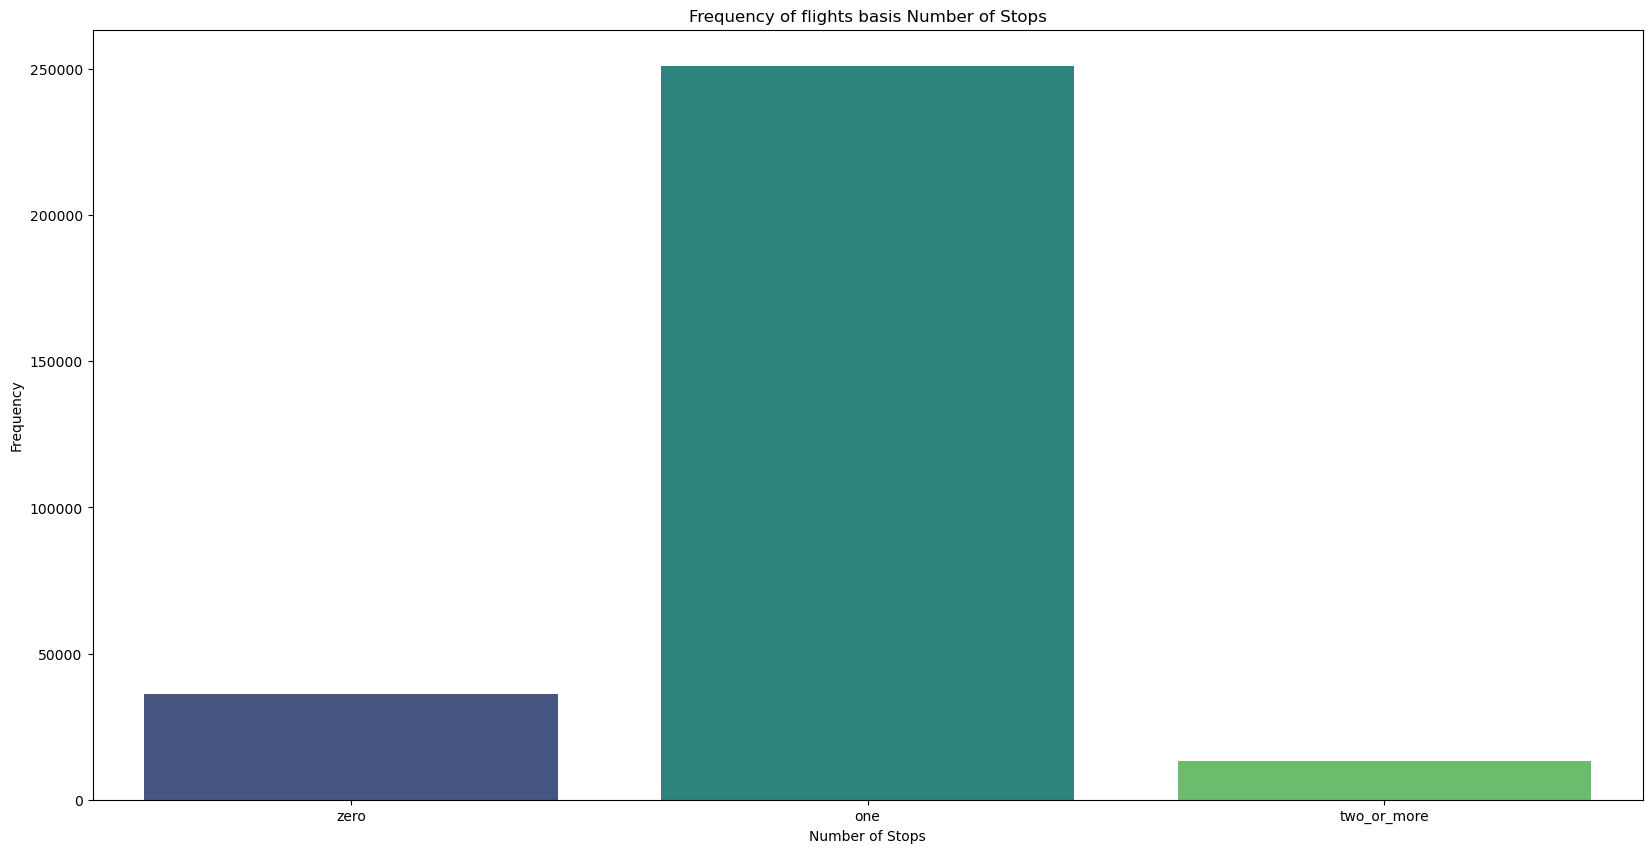

In [21]:
# Frequency of flights basis Number of Stops
plt.figure(figsize=(20,10))
sns.countplot(x=df['stops'], hue=df['stops'], palette='viridis')

plt.title('Frequency of flights basis Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Frequency')

plt.show()

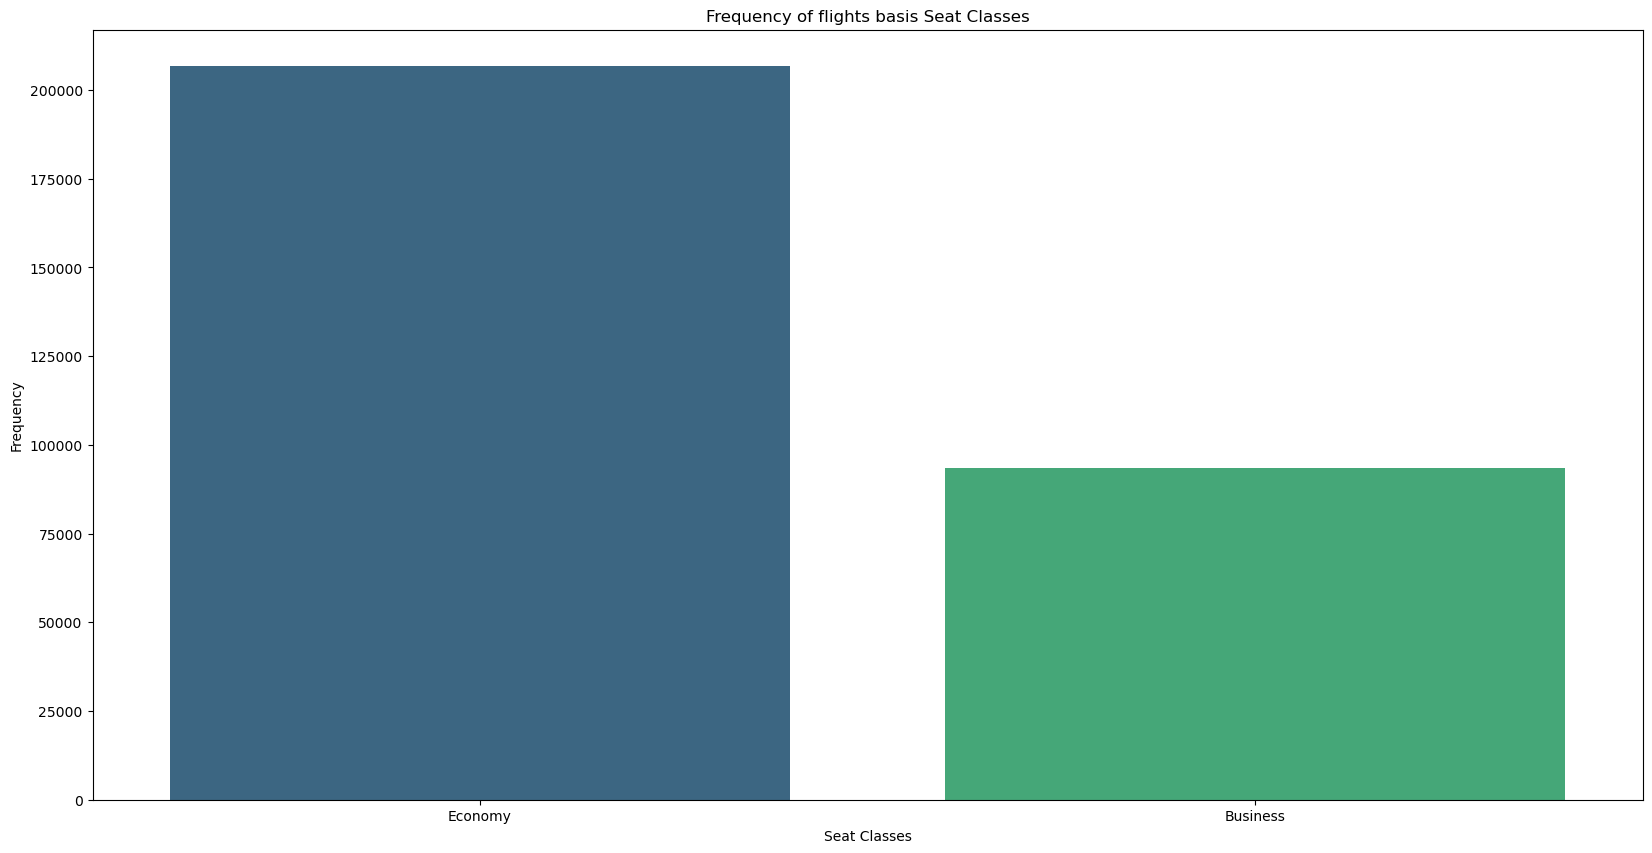

In [22]:
# Frequency of flights basis Seat Classes
plt.figure(figsize=(20,10))
sns.countplot(x=df['class'], hue=df['class'], palette='viridis')

plt.title('Frequency of flights basis Seat Classes')
plt.xlabel('Seat Classes')
plt.ylabel('Frequency')

plt.show()

# Pre-processing

### Label Encoding

In [23]:
# Encoding data
le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


### Feature Selection

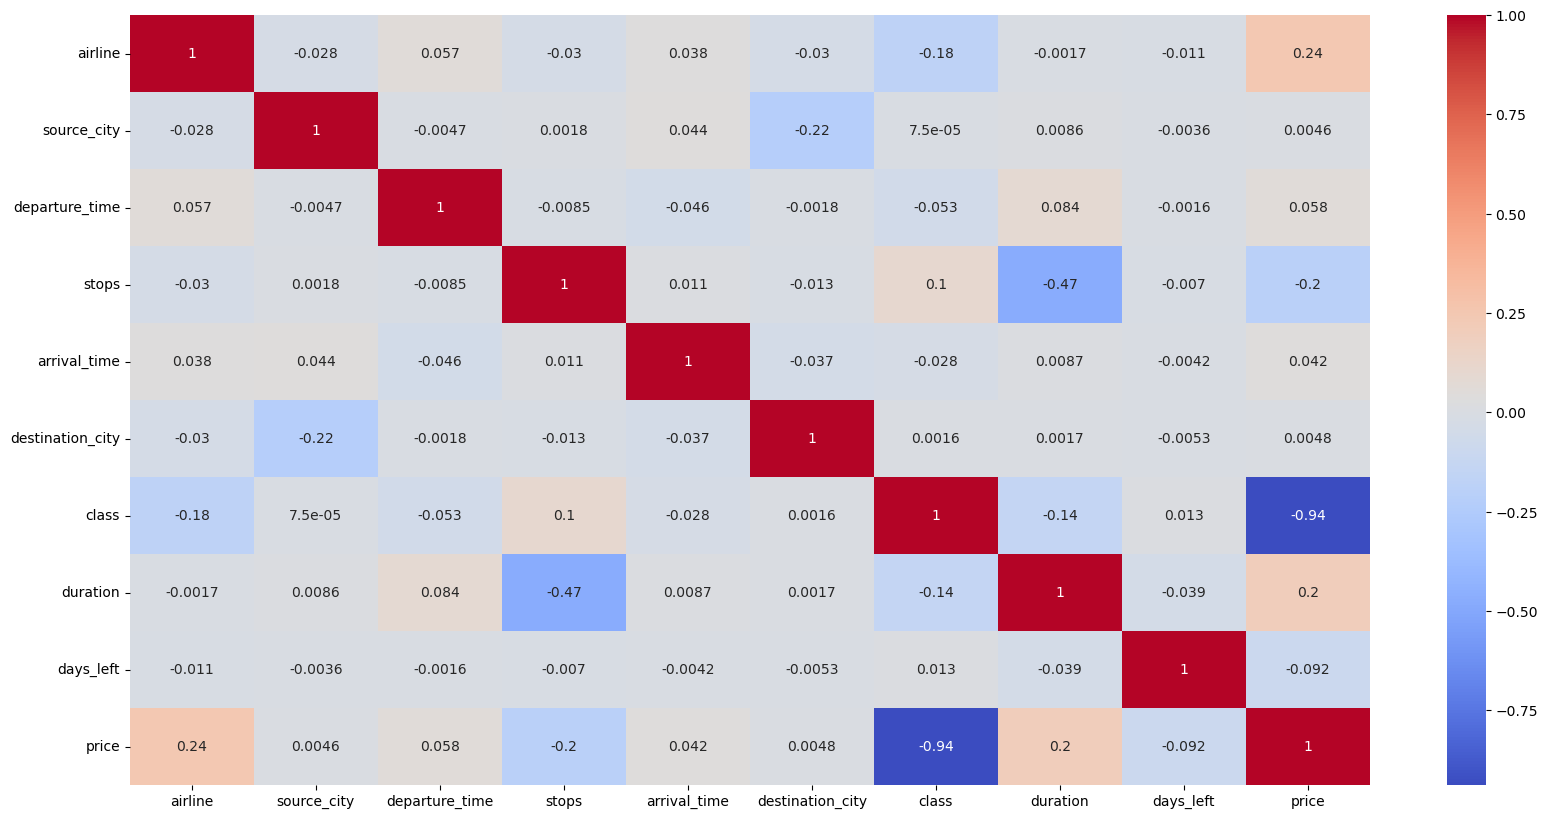

In [24]:
# Heatmap
grouped_data = df.drop(columns=['flight'])

plt.figure(figsize=(20,10))
sns.heatmap(grouped_data.corr(), annot=True, cmap='coolwarm')

plt.show()

In [25]:
col_list = []

for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

In [26]:
X = df[col_list]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


### Splitting into Train and Test sets

In [27]:
# X = X (from above)
y = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Scaling data

In [29]:
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Linear Regression

In [31]:
# Fitting into Linear Reg model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([ 4572.47722217, 52809.22690738,  7857.62664973, ...,
        5837.9566051 , -1555.5112795 , 58744.17576175])

In [33]:
# Actual Value vs Predicted Value
difference_lr = pd.DataFrame(
    np.c_[y_test, y_pred_lr],
    columns = ['Actual Value', 'Predicted Value']
)

difference_lr

,Actual Value,Predicted Value
0,7366.0,4572.477222
1,64831.0,52809.226907
2,6195.0,7857.626650
3,60160.0,56096.253996
4,6578.0,6656.438105
...,...,...
60026,5026.0,5820.248216
60027,3001.0,486.438325
60028,6734.0,5837.956605
60029,5082.0,-1555.511279


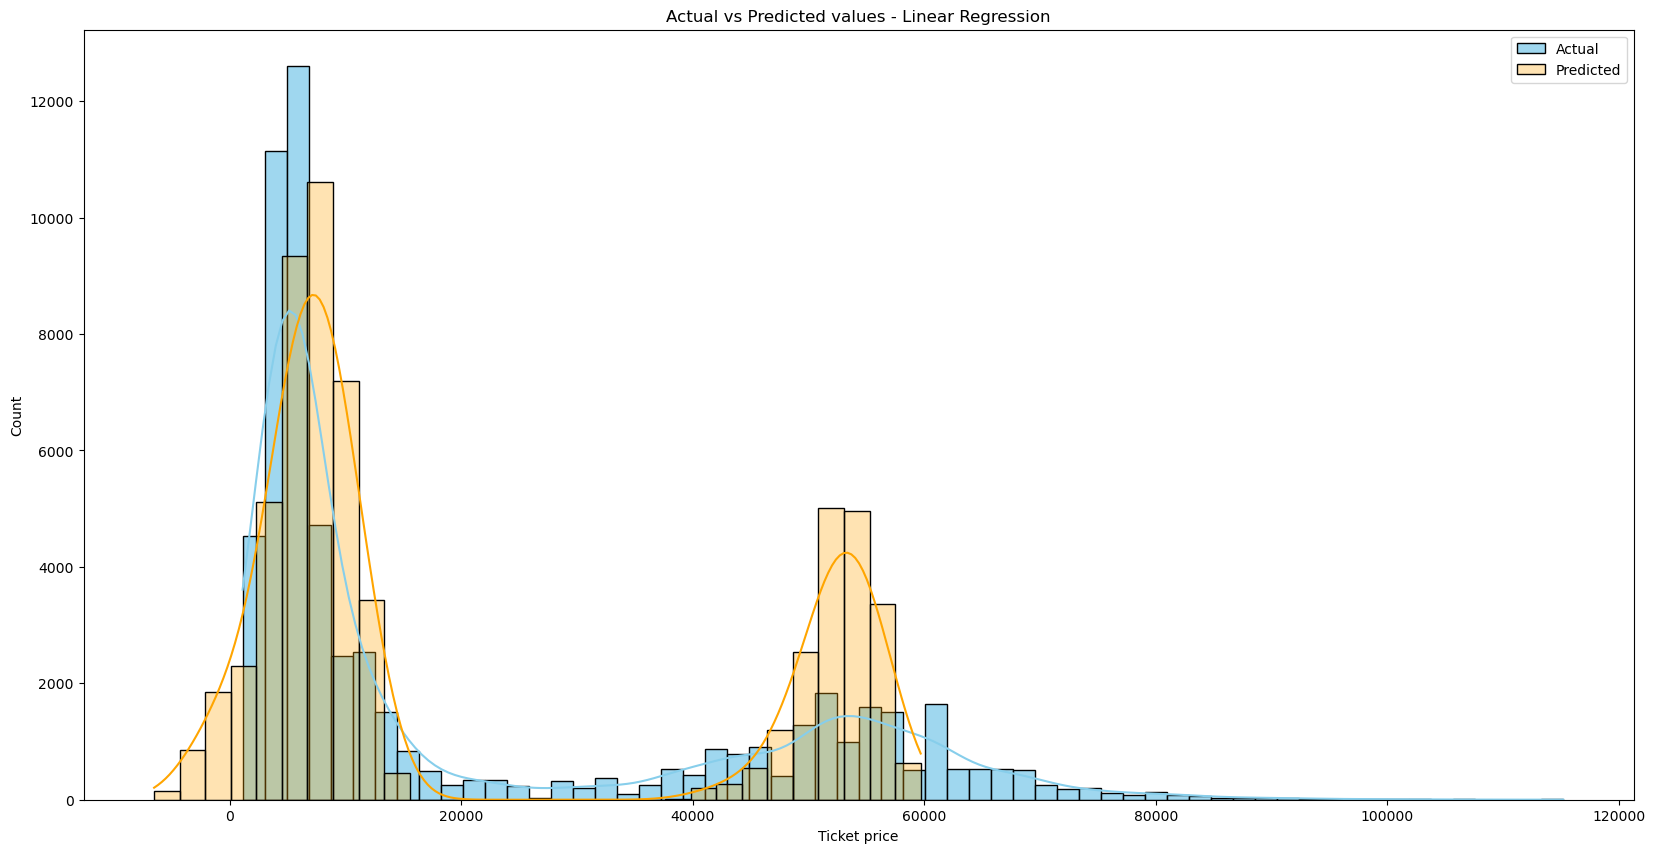

In [34]:
# Plotting Actual and Predicted values - Linear Regression
plt.figure(figsize=(20,10))

sns.histplot(y_test, label='Actual', color="skyblue", alpha=0.8, kde=True)
sns.histplot(y_pred_lr, label='Predicted', color="orange", alpha=0.3, kde=True)

plt.title('Actual vs Predicted values - Linear Regression')
plt.xlabel('Ticket price')
plt.ylabel('Count')

plt.legend()
plt.show()

# Decision Tree Regressor

In [35]:
# Fitting into Decision Tree model 
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([ 7366., 64831.,  6195., ...,  6734.,  5082., 70049.])

In [37]:
# Actual Value vs Predicted Value
difference_dt = pd.DataFrame(
    np.c_[y_test, y_pred_dt],
    columns = ['Actual Value', 'Predicted Value']
)

difference_dt

,Actual Value,Predicted Value
0,7366.0,7366.0
1,64831.0,64831.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3428.0
60028,6734.0,6734.0
60029,5082.0,5082.0


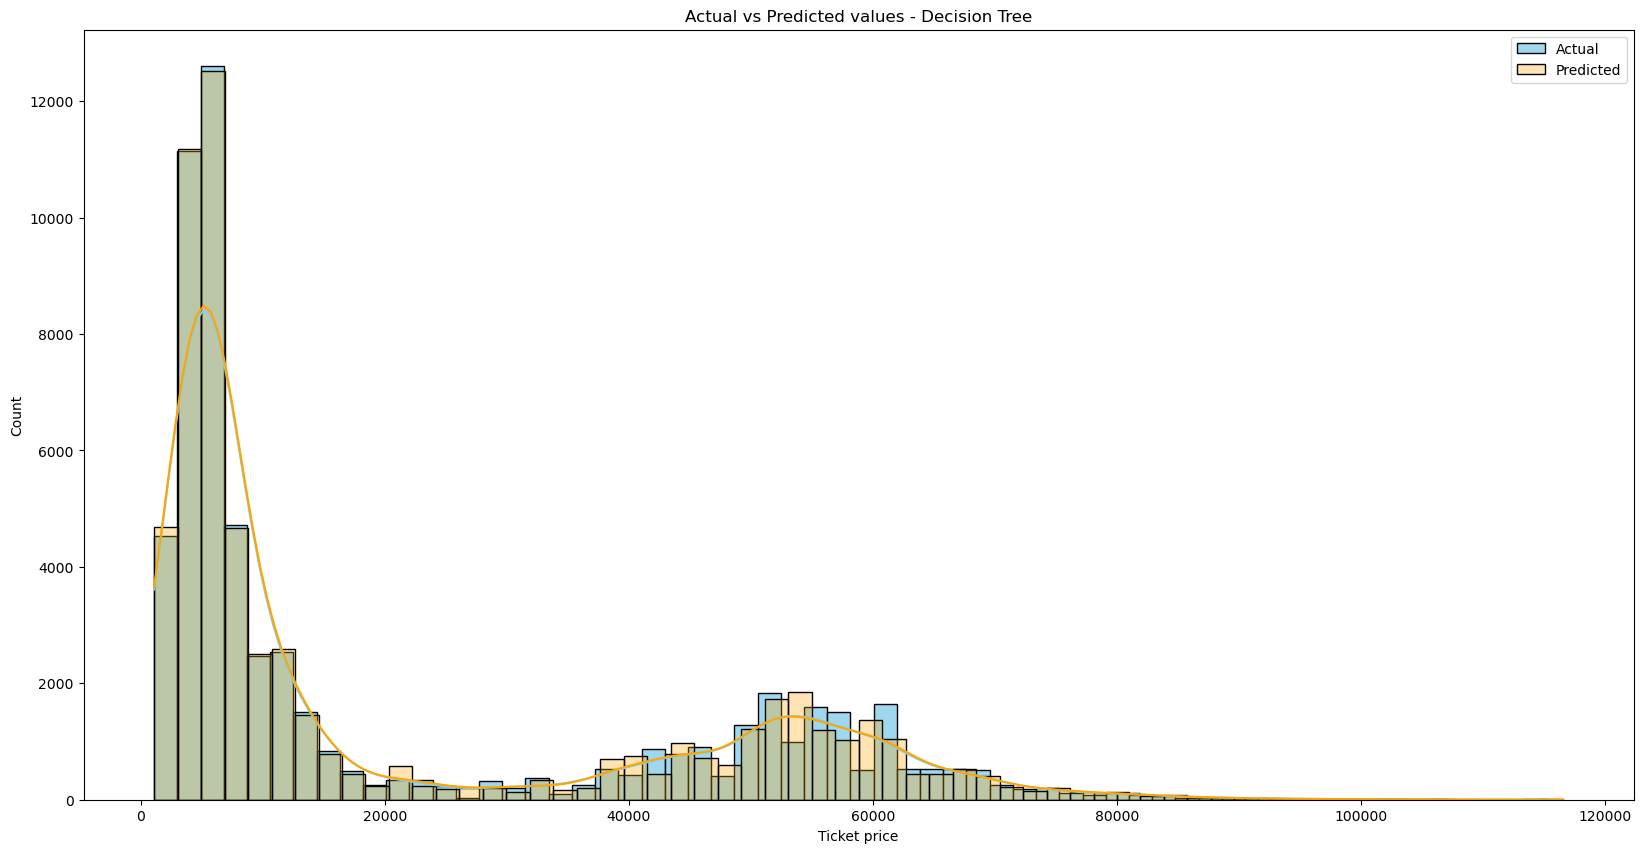

In [38]:
# Plotting Actual and Predicted values - Decision Tree
plt.figure(figsize=(20,10))

sns.histplot(y_test, label='Actual', color="skyblue", alpha=0.8, kde=True)
sns.histplot(y_pred_dt, label='Predicted', color="orange", alpha=0.3, kde=True)

plt.title('Actual vs Predicted values - Decision Tree')
plt.xlabel('Ticket price')
plt.ylabel('Count')

plt.legend()
plt.show()

# Random Forest Regressor

In [ ]:
# Fitting into Random Forest Regressor model
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
# Predictions
y_pred_rfr = rfr.predict(X_test)
y_pred_rfr

array([ 6668.72, 67053.08,  6195.  , ...,  6566.09,  4237.9 , 69967.54])

In [41]:
# Actual Value vs Predicted Value
difference_rfr = pd.DataFrame(
    np.c_[y_test, y_pred_rfr],
    columns = ['Actual Value', 'Predicted Value']
)

difference_rfr

,Actual Value,Predicted Value
0,7366.0,6668.720000
1,64831.0,67053.080000
2,6195.0,6195.000000
3,60160.0,60387.370000
4,6578.0,6554.620000
...,...,...
60026,5026.0,5242.930000
60027,3001.0,3277.701333
60028,6734.0,6566.090000
60029,5082.0,4237.900000


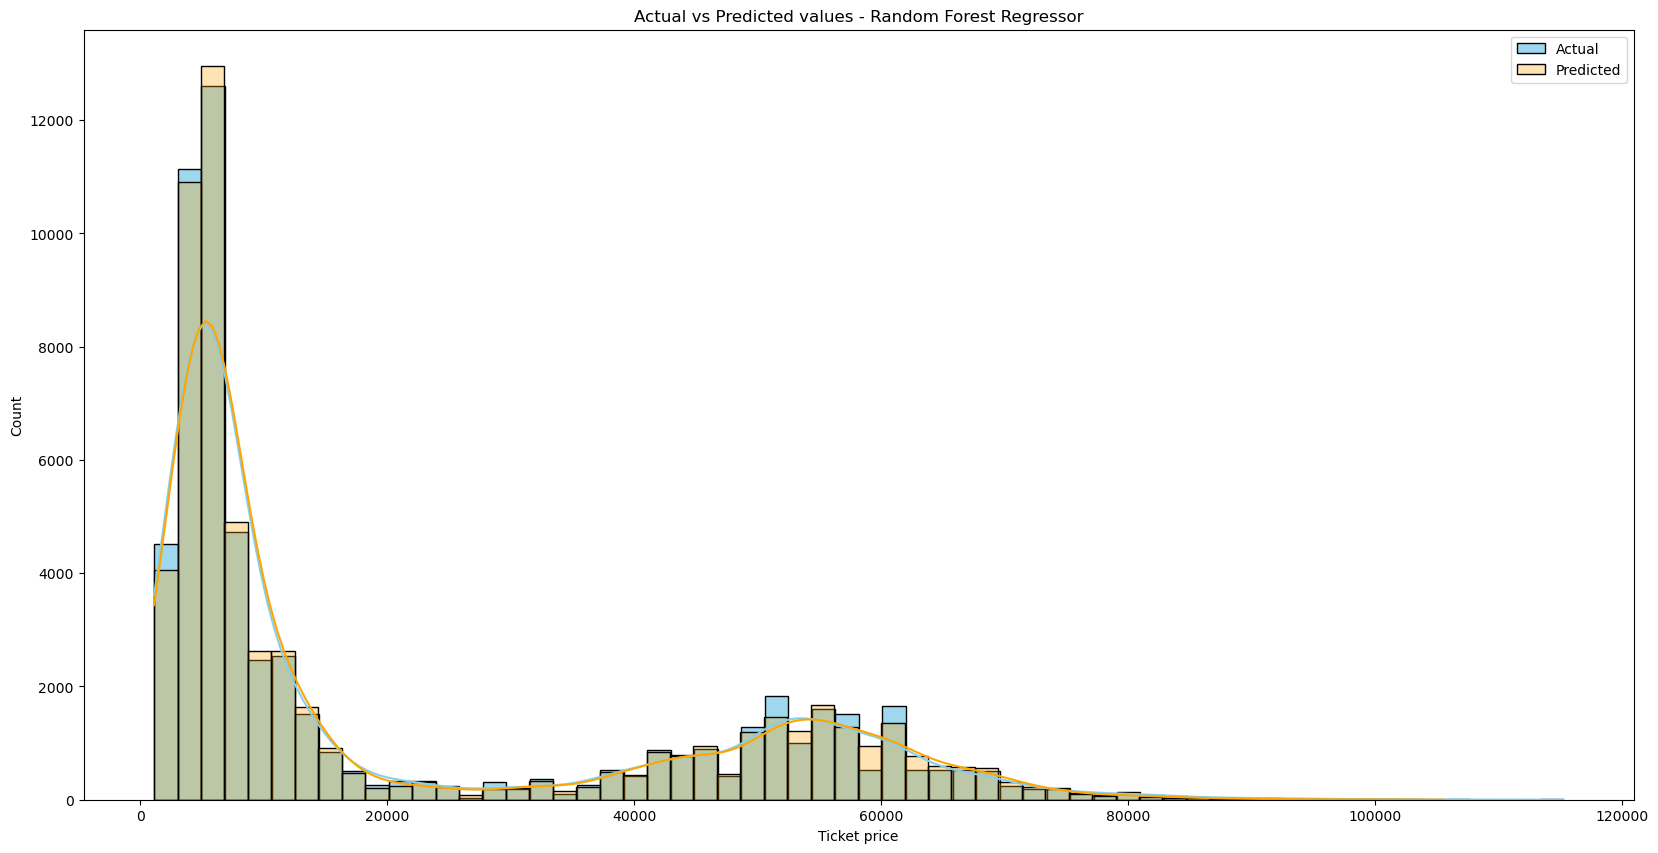

In [42]:
# Plotting Actual and Predicted values - Random Forest Regressor
plt.figure(figsize=(20,10))

sns.histplot(y_test, label='Actual', color="skyblue", alpha=0.8, kde=True)
sns.histplot(y_pred_rfr, label='Predicted', color="orange", alpha=0.3, kde=True)

plt.title('Actual vs Predicted values - Random Forest Regressor')
plt.xlabel('Ticket price')
plt.ylabel('Count')

plt.legend()
plt.show()

# Model Analysis

LR - Linear Regression model


DT - Decision Tree Regressor model


RFR - Random Forest Regressor model

In [43]:
# r2_score
print(f'LR: {metrics.r2_score(y_test, y_pred_lr)}')
print(f'DT: {metrics.r2_score(y_test, y_pred_dt)}')
print(f'RFR: {metrics.r2_score(y_test, y_pred_rfr)}')

LR: 0.9045526175497736
DT: 0.9722856877890225
RFR: 0.9826278900289426


In [44]:
# MSE
print(f'LR: {metrics.mean_squared_error(y_test, y_pred_lr)}')
print(f'DT: {metrics.mean_squared_error(y_test, y_pred_dt)}')
print(f'RFR: {metrics.mean_squared_error(y_test, y_pred_rfr)}')

LR: 49201433.711640455
DT: 14286236.668912265
RFR: 8955014.744569184


In [45]:
# RMSE
print(f'LR: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))}')
print(f'DT: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))}')
print(f'RFR: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))}')

LR: 7014.373365571614
DT: 3779.7138342620947
RFR: 2992.493065082889


In [46]:
# MAE
print(f'LR: {metrics.mean_absolute_error(y_test, y_pred_lr)}')
print(f'DT: {metrics.mean_absolute_error(y_test, y_pred_dt)}')
print(f'RFR: {metrics.mean_absolute_error(y_test, y_pred_rfr)}')

LR: 4627.3552157602
DT: 1299.9931396556224
RFR: 1195.002627102518


In [47]:
# MAPE
print(f'LR: {metrics.mean_absolute_percentage_error(y_test, y_pred_lr)}')
print(f'DT: {metrics.mean_absolute_percentage_error(y_test, y_pred_dt)}')
print(f'RFR: {metrics.mean_absolute_percentage_error(y_test, y_pred_rfr)}')

LR: 0.43614483147130806
DT: 0.08442915132926217
RFR: 0.07820016836413109
